In [111]:
import pandas as pd
import numpy as np

In [112]:
data= pd.read_csv("/content/AirPassengers.csv")
df=pd.DataFrame(data)

In [113]:
df.dtypes

,0
Month,object
#Passengers,int64


In [114]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [116]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

In [117]:
df.rename(columns={"#Passengers":"Passengers"},inplace=True)

In [118]:
df['Passengers'] = df['Passengers'].astype(float)

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

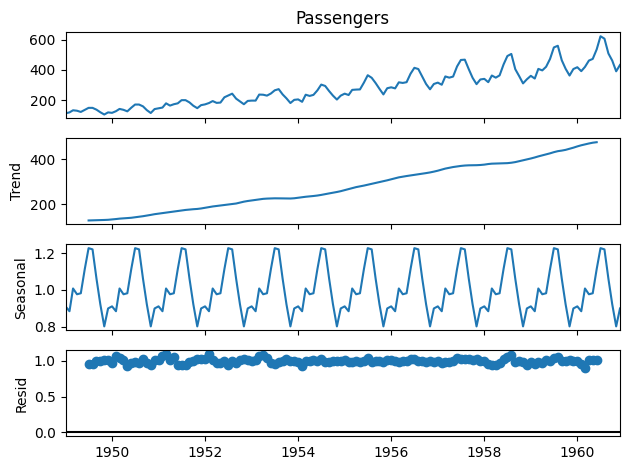

In [120]:
result = seasonal_decompose(df['Passengers'], model='multiplicative')
result.plot()
plt.tight_layout()
plt.show()

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=df['Passengers'].values.reshape(-1,1)
scaled_df = scaler.fit_transform(data)

In [125]:
a=[]
b=[]
def sequence(c,d):
  for i in range(len(c)-d):
    a.append(c[i:i+d])
    b.append(c[d+i])
sequence(scaled_df,12)

In [127]:
a=np.array(a)
b=np.array(b)

(132, 12, 1)

In [128]:
X=a
y=b.reshape(-1,1)

In [135]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(100, return_sequences=False, input_shape=(12, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [142]:
model.fit(X, y, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.1952e-04
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0016
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0013
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.9815e-04
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.8873e-04
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.7769e-04
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.7490e-04
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0011
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0014
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012

In [143]:
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


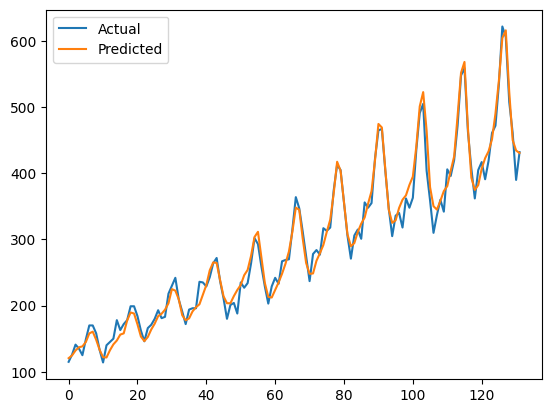

In [144]:
actual = data[12:]
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


In [151]:
!git remote add origin https://github.com/MRamsan/deep_learning.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [150]:
import git